In [3]:
import pandas as pd
import matplotlib.pyplot as plotter
%matplotlib inline

In [4]:
# All Steps except feature selection and Multicollinearity same as LinearRegression without Regularization

dataset = pd.read_csv('./datasets/algerian-forest-fires-cleaned.csv')
dataset.drop(['month', 'day', 'year', 'Fire'], axis = 1, inplace = True)

# Aliasing Independent and Dependent Features
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

# No Need for Feature Selection and Multi-Collinearity Check. Model Hyperparameters will handle itself

# Dataset Split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 13)

# Standardization of Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_Train)
X_Train_Norm = pd.DataFrame(scaler.transform(X_Train), columns = X_Train.columns)
X_Test_Norm = pd.DataFrame(scaler.transform(X_Test), columns = X_Test.columns)

In [5]:
# Linear (Lasso) Regression Model Training (L1 Regularization)
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted = model.predict(X_Test_Norm)
Y_Train_Predicted = model.predict(X_Train_Norm)

In [6]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted),2)}%')

For Test Dataset
Mean Absolute Error: 1.152979338288831
Root Mean Square Error: 1.548945096198058
R² Score: 94.81%

For Training Dataset
Mean Absolute Error: 1.2381052070190497
Root Mean Square Error: 1.7463074256207158
R² Score: 94.75%


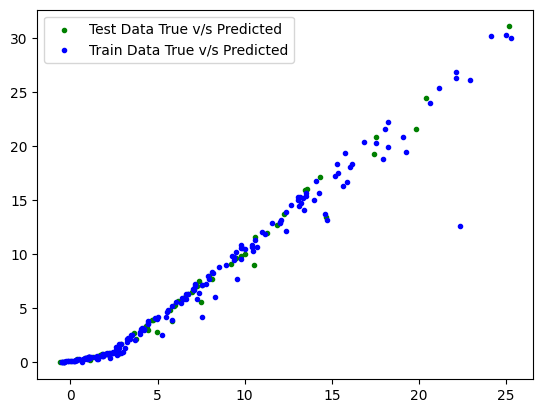

In [7]:
plotter.scatter(Y_Test_Predicted, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()